# Project 2 report

*You can delete this cell, and add new cells to put your code and write your report.*

*To add a new code or Markdown cell, click the <kbd>+</kbd> button in the toolbar. By default, this will be a code cell; to change it to Markdown, click the drop-down menu in the toolbar which says <kbd>Code</kbd>, and select <kbd>Markdown</kbd> in the list.*

*To format the text in a Markdown cell, just run the cell. To edit it again, double-click on it. For examples of Markdown formatting, you can double-click on any Markdown cell in any of the course notebooks. For instance, there are lots of examples at the top of the Week 1 tutorial notebook.*

In [1]:
import openaq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os
import matplotlib as mpl
import warnings
import glob
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Extra import, you should install packages folium, meteostat and scikit-learn in your environment.
# We have a new environment file called environment_new.yml, you can import this new file or install packages.
# Packages folium and meteostat cannot be installed with conda, you need to use 'pip install -' to install in your terminal.
import folium
from meteostat import Point, Daily
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
# Creat a folder to save data
if os.path.exists('London_weather') == False:
    os.mkdir('London_weather')

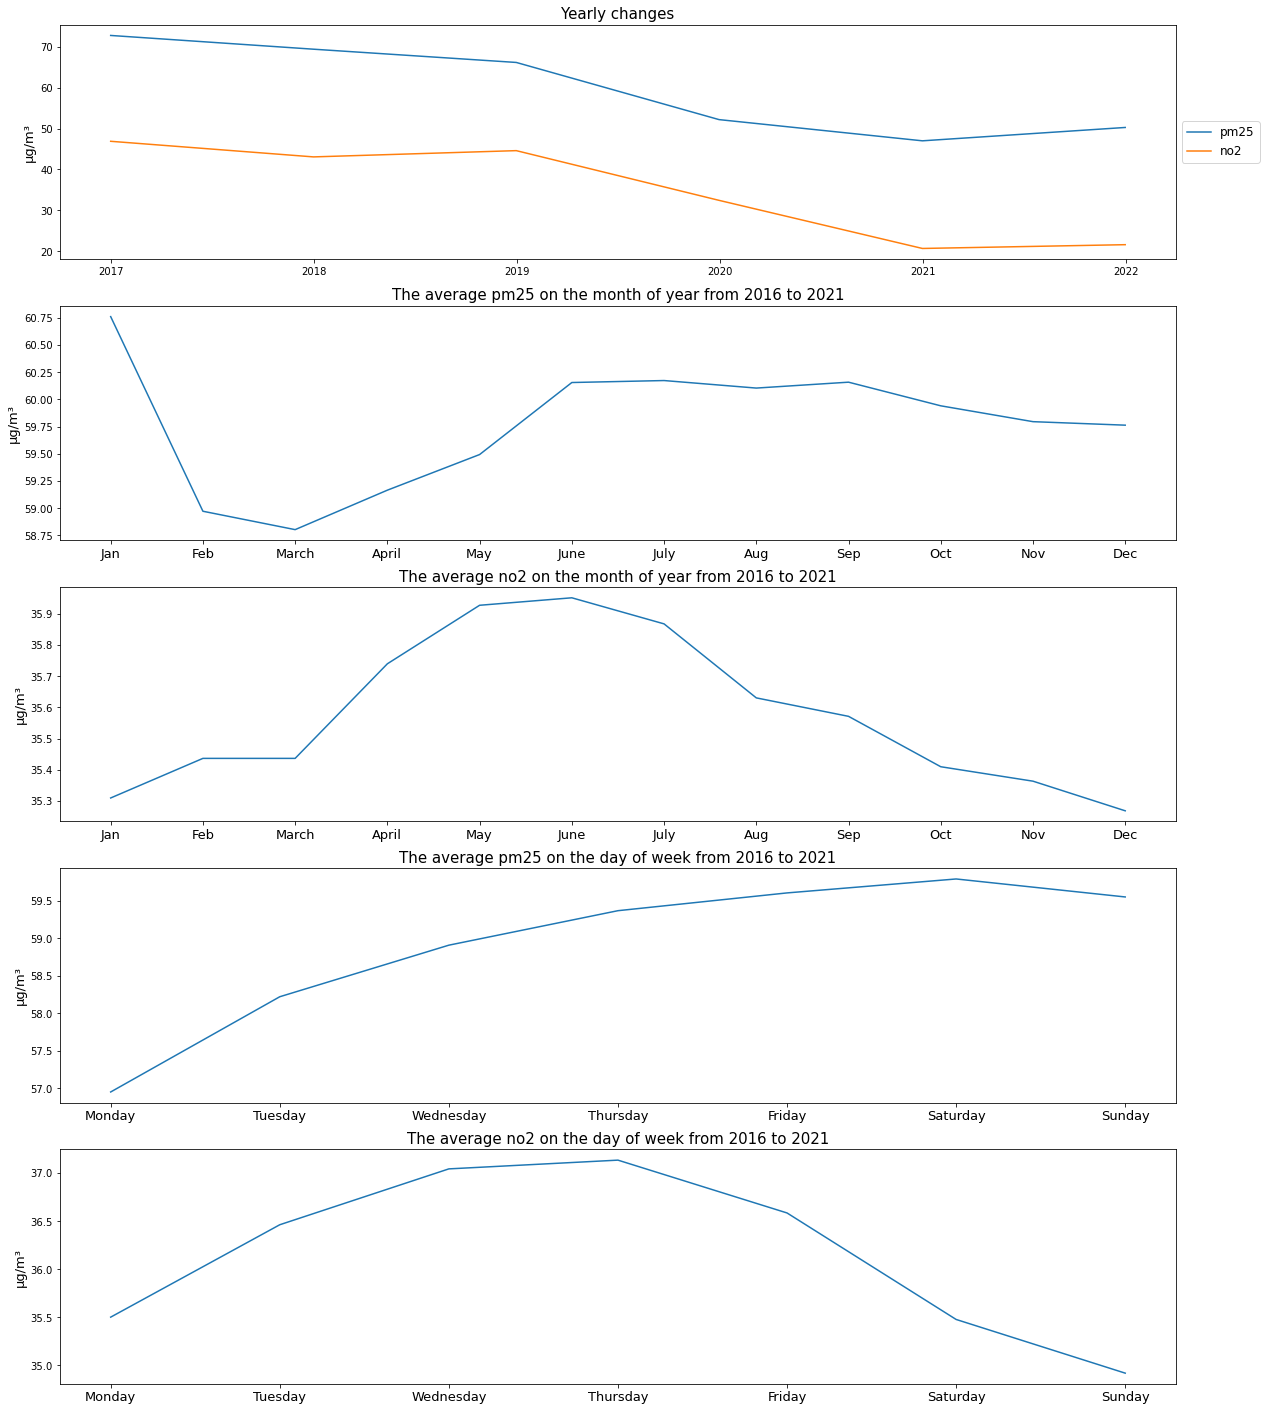

In [3]:
# Question 1
# Investigate how air pollution(pm25 and no2) vary over time

# Read the CSV file London_air_quality to compute the datetime later
L = pd.read_csv('London_air_quality.csv')
L['date'] = pd.to_datetime(L['date'])   

# Read all of the data of pollutants in London
London_all_pollutants = pd.read_csv('London_air_quality.csv')
London_all_pollutants['date'] = pd.to_datetime(London_all_pollutants['date'])
London_all_pollutants = pd.DataFrame(London_all_pollutants).set_index('date')

# The statistical period and the parameters used in plotting
period = ['Y', 'm', 'w']  # Yearly, monthly and weekly
period2 = ['Y', 'm']
para2_weather = ['tavg', 'prcp', 'wspd'] # The average temperature, precipitation and wind speed
para_pollu = ['pm25', 'no2']
period_name = ['Yearly', 'Monthly']


# Plot 5 figures
# 1 figure for changes of pm25 and no2 over years, 2 for changes on the month and 2 for changes on the day
fig, ax = plt.subplots(5, 1, figsize=(20,25))

# Set the axis labels for pollutants' changes on the month of year and day of week respectively  
x = np.arange(0,7,1)
x1 = np.arange(0,12,1)
x_ticks_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x1_ticks_labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(2):
    ax[i+1].set_xticks(x1)
    ax[i+1].set_xticklabels(x1_ticks_labels, fontsize=13)
    ax[i+3].set_xticks(x)
    ax[i+3].set_xticklabels(x_ticks_labels, fontsize=13)

    
# How pm25 and no2 have generally evolved over the past few years (2016-2021)
for para in para_pollu:
    # Calculate the average of pm25 and no2 per year separately
    L_pollu = London_all_pollutants.resample('Y').agg({f'{para}':np.mean}) 
    ax[0].plot(L_pollu)
    ax[0].set_ylabel('µg/m³', fontsize=13)
    ax[0].legend(['pm25', 'no2'], loc='center left', bbox_to_anchor=[1.0, 0.5], fontsize=12)
    ax[0].set_title(period_name[0]+' changes', fontsize=15)
    
# How pm25 and no2 change depending on the month of year from 2016 to 2021
t = 1 # A timer for plotting
for para in para_pollu:
    mean_m = []
    mean_month = []
    for i in range(12):
        for j in range(0, 2102, 30):
            L_pollu2_month = London_all_pollutants.loc[L['date'][j]: L['date'][j+29], [f'{para}']].values.reshape(-1,1)
            mean_m.append(L_pollu2_month[i])
        mean_month.append(np.mean(mean_m))    
    ax[t].plot(mean_month)
    ax[t].set_title(f'The average {para} on the month of year from 2016 to 2021', fontsize=15)
    ax[t].set_ylabel('µg/m³', fontsize=13)
    t += 1
    
    
# How pm25 and no2 change depending on the day of week from 2016 to 2021
t = 3 # A timer for plotting
for para in para_pollu:
    mean = []
    mean_week = []
    for i in range(7):
        for j in range(2, 2124, 7):
            L_pollu2 = London_all_pollutants.loc[L['date'][j]: L['date'][j+6], [f'{para}']].values.reshape(-1,1)
            mean.append(L_pollu2[i])
        mean_week.append(np.mean(mean))    
    ax[t].plot(mean_week)
    ax[t].set_title(f'The average {para} on the day of week from 2016 to 2021', fontsize=15)
    ax[t].set_ylabel('µg/m³', fontsize=13)
    t += 1

**1. Yearly change for $PM_{2.5}$ and $NO_2$**

From table 1, the plot showed that annual mean changes of $PM_{2.5}$ and $NO_2$ have the same pattern of variation.Both polluatnts steadily decreasing from 2017 to 2021 despite a relative stablity for $NO_2$ between 2018 and 2019 since this could be a consequence of the large reduction in emissions from both industrial fuel and road transport sources which have a close relation. To be more specific, the annual average decline in concentrations of $PM_{2.5}$ and $NO_2$ becomes more dramatic from 2019 to 2021 of 18 $\mu$ g/$m^3$ ($PM_{2.5}$) and 23 $\mu$ g/$m^3$ ($NO_2$).The notable decrease were statistically significant because it is related to the UK government policy published on 14 January,2019. The Clean Air Strategy 2019 aims to sets the plans for dealing with all sources of air pollution and reduce emissions from transport, homes, farming and industry.While for the majority of 2021 annual mean average for $PM_{2.5}$ and $NO_2$ are below perviouslast longer for the whole year of 5 $\mu$ g/$m^3$ ($PM_{2.5}$) and 2 $\mu$ g/$m^3$ ($NO_2$).Due to the coronavirus impact and UK national lock down , there is a reduction in some polluting activities may have helped temper transboundary-related increases in both $PM_{2.5}$ and $NO_2$. And finally when returning to the third quarter of 2021 and 2022, everything is back to normal with a little rising for $PM_{2.5}$ and $NO_2$.


**2. Seasonal change for $PM_{2.5}$ and $NO_2$**

From table 2 and 3 ,the plot shows that the average concentration of $PM_{2.5}$ and $NO_2$ changed significant with the seasons and these two pollutants have different trend changes for the spring and winter,besides $NO_2$ have a larger range of variation compared with the $PM_{2.5}$ in the same pattern change of summer and winter.On the one hand, the processes of $NO_2$ production and extinction are relatively simple compared with $PM_{2.5}$ besides high temperature and strong light will facilitate its photochemical transformation. Hence considering the weather and sunlight condition, $NO_2$ keeps a relative low level in spring and winter while it reached the maximum of 35.9 $\mu$ g/$m^3$ in June. On the other hand, conversely, the sources of $PM_{2.5}$ pollutants are complex, diverse and highly influenced by weather condition (discussed in more depth later), and their dynamics are subject to many uncertain aspects.But we still can knew that spring has the largest porpotion of affecting the average mean of $PM_{2.5}$ where it reaches the minimum of 58.80 $\mu$ g/$m^3$. During the summer, the averge mean of $PM_{2.5}$ keeps increase to its maximum of 60.05 $\mu$ g/$m^3$ and it lasted in the small range of the maximum till all autumn and winter with a final level at 59.75 $\mu$ g/$m^3$. 
The similarlity of both $PM_{2.5}$ and $NO_2$ reached the maximum in June and it is related to the summer weather and the high demand for the transportion.While after the maximum ,the $PM_{2.5}$ keeps a stable level and $NO_2$ has a notably decline under the condition of colder weather condition.It shows that 
The variation in $PM_{2.5}$ concentrations is closely related to weather conditions. This is because the distribution of pollutant sources is generally fixed for a given district city and pollutant emissions are relatively within a range. While the atmospheric dispersion capacity is relatively poor in autumn and winter.The relatively poor dispersion capacity of the atmosphere in autumn and winter, the low atmospheric precipitation and the increase in local particulate matter concentrations is significantly influenced by factors such as poorer atmospheric dispersion, lower atmospheric precipitation and increased frequency of inversions in autumn and winte.The same emissions may produce very different pollution conditions, so that in a sense the $PM_{2.5}$ concentrations may be higher than those in the atmosphere where our plot has proved this idea since its average value is higher. And the PM2.5 concentrations are predictable in sense.


**3. Weekly change for $PM_{2.5}$ and $NO_2$**

From table 4 and 5 , the plot shows that the average concentration of $PM_{2.5}$ and $NO_2$ changed differently during the week. $PM_{2.5}$ has a steady increase during the week to the maximum of 60 $\mu$ g/$m^3$ on Saturday and then have a small decline since we consider that due to the weekend people preferred to stay home without traveling or visiting useing the vericle which will temper the 
effect of the $PM_{2.5}$ . Compared with the distribution of monthly change for $NO_2$ ,the weekly change shows the similarity to the trend of increase and decrease of change. With the middle of the week which I mean on Thursday the $NO_2$ reaches the maximum of 37.9 
$\mu$ g/$m^3$ referring to the annual average plot on the middle of the year in June, so the emission of $NO_2$ has been more regular and reasonable to find the reasons since it depends on the light and temperature which we have mentioned before.





tavg = -0.029788348562555595 * pm25 + 0.519003680161196
prcp = -0.09795358085893224 * pm25 + 0.07490991858917098
wspd = -0.23131258807131758 * pm25 + 0.3477792090174522


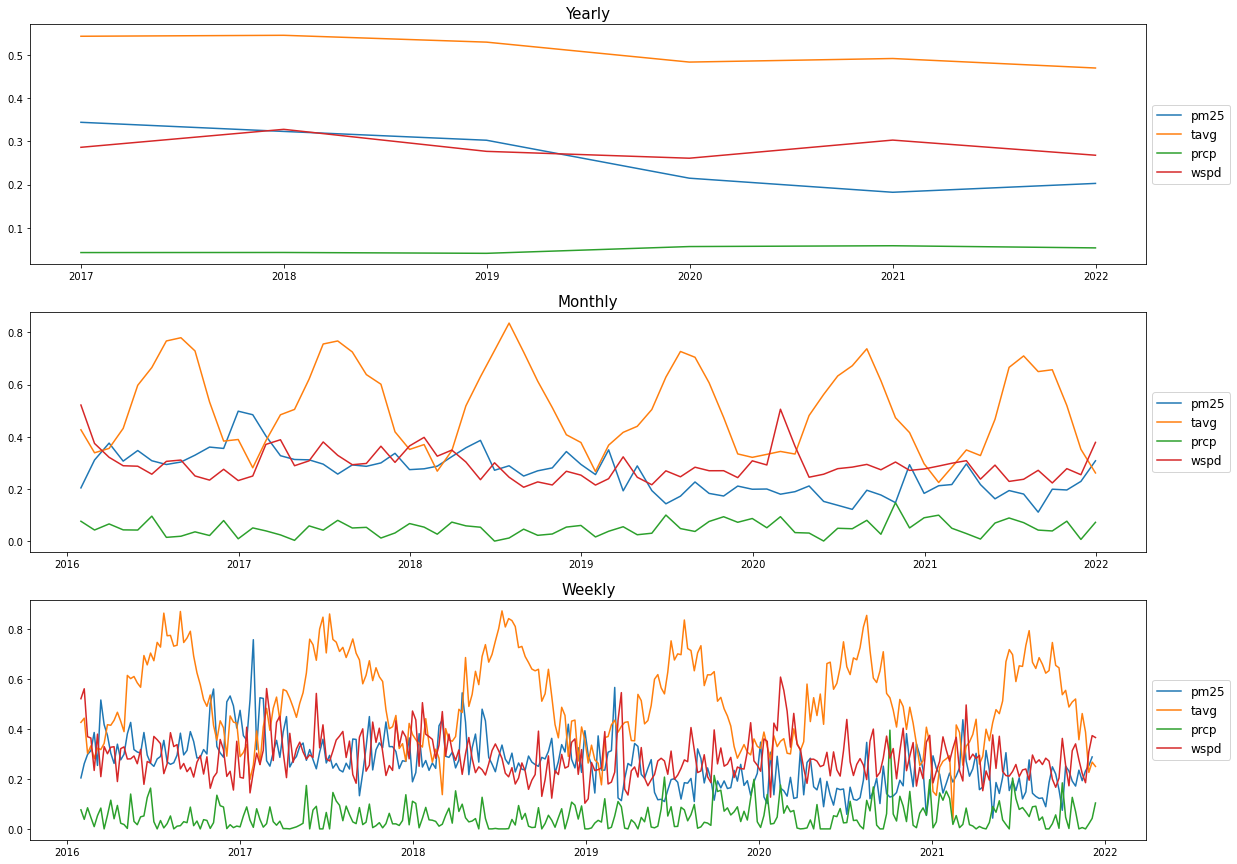

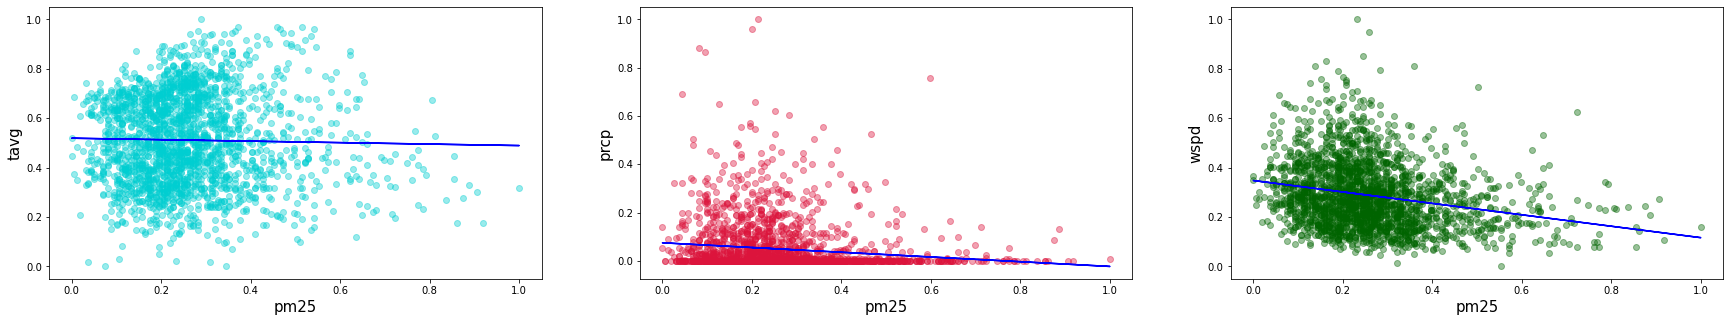

In [4]:
# Question 2
# Investigate the influence of weather conditions(temperature, precipitation and wind speed) on air pollution(pm25)

# Import the current year, month and day
date_now = datetime.date.today()
year_now = date_now.year
month_now = date_now.month
day_now = date_now.day

# Set time period for the request for the weather data
start = datetime.datetime(2016, 1, 30)
end = datetime.datetime(year_now, month_now, day_now) # end time is now

# Create Point for London (API meteostat.point(latitute, longitude) North&East are positive，South&West are negative)
London = Point(51.5072, -0.1276)

# Request London weather data
London_weather = Daily(London, start, end)
London_weather = London_weather.fetch()

# Save the data tavg, tmin, tmax, prcp, pres and wspd as a CSV file separately
para_weather = ['tavg', 'tmin', 'tmax', 'prcp', 'pres', 'wspd'] 
for para in para_weather:
    L_weather = London_weather.loc[:, para]
    L_weather.to_csv(f'London_weather/{para}.csv')

# Save all of the weather data in London as a CSV file
London_weather.to_csv('London_weather/London_weather.csv', index=True) 

# Read all of the weather data in London
L_weather_all = pd.read_csv('London_weather/London_weather.csv')
L_weather_all['date'] = pd.to_datetime(L_weather_all['time'])
L_weather_all = pd.DataFrame(L_weather_all).set_index('date')


# Use Min-Max Normalization for the data of pm25, tavg, prcp and wspd in London
L_pm25 = London_all_pollutants['pm25']
mms_pm25 = (L_pm25 - L_pm25.min())/(L_pm25.max() - L_pm25.min())
London_all_pollutants['pm25'] = mms_pm25

L_tavg = L_weather_all['tavg']
mms_tavg = (L_tavg - L_tavg.min())/(L_tavg.max() - L_tavg.min())
L_weather_all['tavg'] = mms_tavg

L_prcp = L_weather_all['prcp']
mms_prcp = (L_prcp - L_prcp.min())/(L_prcp.max() - L_prcp.min())
L_weather_all['prcp'] = mms_prcp

L_wspd = L_weather_all['wspd']
mms_wspd = (L_wspd - L_wspd.min())/(L_wspd.max() - L_wspd.min())
L_weather_all['wspd'] = mms_wspd

# Transform NaN in CSV files wspd&prcp into the average attribute in dataframe London_weather
L_weather_all['wspd'] = L_weather_all.wspd.fillna(L_weather_all['wspd'].mean())  # Transform NaN into the average wspd in London_weather
L_weather_all['prcp'] = L_weather_all.prcp.fillna(L_weather_all['prcp'].mean())  # Transform NaN into the average prcp in London_weather

# Plot the yearly, monthly and weekly changes in weather in London
period_name = ['Yearly', 'Monthly', 'Weekly']
fig, ax = plt.subplots(3, 1, figsize=(20,15))
i = 0
for p in period:
    pm25_minMax = London_all_pollutants.resample(f'{p}').agg({'pm25':np.mean})
    tavg_minMax = L_weather_all.resample(f'{p}').agg({'tavg':np.mean})
    prcp_minMax = L_weather_all.resample(f'{p}').agg({'prcp':np.mean})
    wspd_minMax = L_weather_all.resample(f'{p}').agg({'wspd':np.mean})
    ax[i].plot(pm25_minMax)
    ax[i].plot(tavg_minMax)
    ax[i].plot(prcp_minMax)
    ax[i].plot(wspd_minMax)
    ax[i].legend(['pm25', 'tavg', 'prcp', 'wspd'], loc='center left', bbox_to_anchor=[1.0, 0.5], fontsize=12) 
    ax[i].set_title(period_name[i], fontsize=15)
    i += 1
    

# Fit linear regression on each set of data separately
LR = LinearRegression() 
poly = PolynomialFeatures(degree=1) 

fig, ax = plt.subplots(1,3, figsize=(30,5))   
color = ['#00CED1', '#DC143C', '#006400']
i = 0
for para2 in para2_weather:
    plt.subplot(1, 3, i+1)
    x = London_all_pollutants['pm25'][0:2136].values.reshape(-1, 1)
    y = L_weather_all[f'{para2}'][0:2136].values.reshape(-1, 1)
    LR.fit(x, y)
    
    # Fitting Polynomial Regression to the dataset 
    x_poly = poly.fit_transform(x) 
    poly.fit(x_poly, y) 
    LR2 = LinearRegression() 
    LR2.fit(x_poly, y)
    coef = LR2.coef_[0][1]
    intercept = LR2.intercept_[0]
    print(f'{para2} = {coef} * pm25 + {intercept}') 
    plt.plot(x, LR2.predict(poly.fit_transform(x)), color = 'blue') 
    
    plt.scatter(London_all_pollutants['pm25'][0:2136], L_weather_all[f'{para2}'][0:2136], c=color[i], alpha=0.4)
    plt.xlabel('pm25', fontsize=15)
    plt.ylabel(f'{para2}', fontsize=15)
    i += 1

Now we investigate $PM_{2.5}$ with the respect to the change of temperture , precipitation of rainfall and wind speed. Before the plot, we had to normailize these aspects and as we can see from table 1 that yearly wind speed keeps stable from 2017 to 2022 below 0.1 level.And both yearly temperture and yearly precipitation of rainfall also keep a particularly stable range for the past 5 years , with 0.55 and 0.3 respectively.Considering the monthly and weekly pattern of trend of $PM_{2.5}$ ,temperture , precipitation of rainfall and wind speed, it shows similarities with a same stable level compared with yearly trend.


From table 4 with respect to the temperature related to $PM_{2.5}$ , though we can derive a linear regression line from the scatterplots, we still noticed that these data uniformly around the line, which means temperature can either be positively or negatively correlated with various matters depending on the geographical location, meteorological, and other factors. To be more specific ,high temperature means to increase PM 2.5 concentrations by promoting photochemical reactions and accelerating formation of PM 2.5 precursors leading to other secondary pollutants' formation.Besides,increased temperature may induce formation of a temperature inversion layer due to low surface temperature and result in accumulation of $PM_{2.5}$ in winter, these two aspects of correalation have a clear description from the table 4 with scatterplots. Since, these ideas also have been proved by Yerramilli (2013) who has integrated the Hybrid Single-Particle Lagrangian Integrated Trajectory (HYSPLIT) atmospheric dispersion model and the advanced research version of Weather Research and Forecasting (WRF) mesoscale atmospheric model to assess  extent of contribution to $PM_{2.5}$.

From table 5 with respect to precipitation of rainfall related to $PM_{2.5}$ , compared with wind speed and temperature, we can find that the plots with rainfall also has a close related to the $PM_{2.5}$ , with a higher ra.While there exists some plots away from the regression line means that there still exists postively and negatively impact on it.because under low wind speed in table 5, high humidity and conditions where pollutants are not easily dispersed, rainfall is not effective in reducing average concentrations on the same day. While under high wind speed conditions, pollutants are diluted by wind dispersion, and the wet deposition effect of rainfall on pollutants contributes to the reduction of $PM_{2.5}$ average concentration.Hence it explains well in the aspect that not all precipitation processes can reduce the $PM_{2.5}$ mass concentration and purify it. In terms of the average purification capacity, the larger the rainfall level, the longer the rainfall duration and the stronger the rainfall intensity, the more powerful the rainfall process is in reducing the  $PM_{2.5}$ mass concentration and the more significant the purification effect.Hence the coefficient with precipitation of rainfall stays at the medium combined with other factors.

From table 6 with respect to the wind speed related to $PM_{2.5}$ , according to Russo who have suggested Lamb weather types (LWT) (Lamb, 1972) and circulation weather types (CWT) in 2014 which are both increasingly popular method of investigating the impact of regional atmospheric circulation patterns on pollutant concentrations. The study also determined that the south-east and north-east flows increased UK ozone concentrations by an average of 10 to 15 $\mu$ g/$m^3$. N02 concentrations were found to increase significantly in winter anticyclonic conditions through pollutant accumulation and under the south-east flow due to long-range transport of pollutants from mainland Europe (Pope et al., 2014). From the plot we can also find the winter increase to the combined effects of increased emissions, more stable conditions and reduced photolysis leading to the accumulation of emission sources since the coefficient of the regression line equals to -0.23 which means it has the most impact on the difussion of $PM_{2.5}$.


<Figure size 1080x720 with 0 Axes>

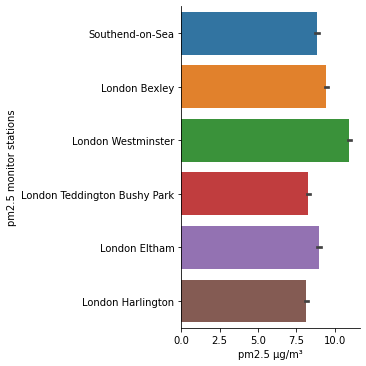

<Figure size 1080x720 with 0 Axes>

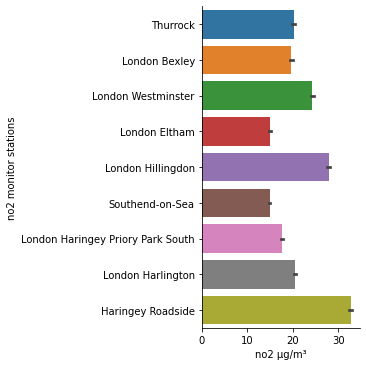

In [5]:
# Question 3
# Choose a city, region, or country with many different stations, and visualise the levels of air pollution on a map.
"""
This part is import the pollutant monitor station information, as the monitor stations changed every hour and may cause confusion,so we
fix a time period (4 years) and save it as csv. Our analysis will based on the data from these csv files. 
"""

#Ignore the unnecessary warning
warnings.simplefilter('ignore')
api = openaq.OpenAQ()

# isExists = os.path.exists("Pollution_Data_pm25")
# isExists = os.path.exists("Pollution_Data_no2")
# if not isExists: 
#     os.makedirs("Pollution_Data_pm25")
#     os.makedirs("Pollution_Data_no2")

# measurements_London_pm25_daily_19_21 = api.measurements(city = "London", parameter = "pm25", date_from = "2019-12-01", date_to = "2021-12-01", df=True, limit = 100000)
# measurements_London_pm25_daily_19_21.to_csv("Pollution_Data_pm25/measurements_London_pm25_daily_19_21.csv", index = True)

# measurements_London_no2_daily_20_21 = api.measurements(city = "London", parameter = "no2", date_from = "2020-12-01", date_to = "2021-12-01", df=True, limit = 80000)
# measurements_London_no2_daily_19_20 = api.measurements(city = "London", parameter = "no2", date_from = "2019-12-01", date_to = "2020-11-30", df=True, limit = 80000)
# measurements_London_no2_daily_20_21.to_csv("Pollution_Data_no2/measurements_London_no2_daily_20_21.csv", index = True)
# measurements_London_no2_daily_19_20.to_csv("Pollution_Data_no2/measurements_London_no2_daily_19_20.csv", index = True)

# Merge our pollution daily into one dateframe

path_no2 = r'Pollution_Data_no2'
all_files_no2 = glob.glob(path_no2 + "/*.csv")

# Input no2 csv
li=[]
for filename in all_files_no2:
    df = pd.read_csv(filename, index_col=None, header=0)
    df = df.sort_index(ascending=False)
    li.append(df)
measurements_London_no2_daily_sum = pd.concat(li, axis=0, ignore_index=True)

# Input pm25 csv
measurements_London_pm25_daily_sum = pd.read_csv("Pollution_Data_pm25/measurements_London_pm25_daily_19_21.csv", index_col=None, header=0)
measurements_London_pm25_daily_sum = measurements_London_pm25_daily_sum.sort_index(ascending=False)

#Data preprocessing, elminite the NaN value and change the "date.utc" to datetime format
measurements_London_pm25_daily_sum = measurements_London_pm25_daily_sum.drop(columns=["unit", "city", "country"])
measurements_London_pm25_daily_sum["date.utc"] = pd.to_datetime(measurements_London_pm25_daily_sum["date.utc"])
measurements_London_pm25_daily_sum["value"] = measurements_London_pm25_daily_sum.value.fillna(measurements_London_pm25_daily_sum["value"].mean())

measurements_London_no2_daily_sum = measurements_London_no2_daily_sum.drop(columns=["unit", "city", "country"])
measurements_London_no2_daily_sum["date.utc"] = pd.to_datetime(measurements_London_no2_daily_sum["date.utc"])
measurements_London_no2_daily_sum["value"] = measurements_London_no2_daily_sum.value.fillna(measurements_London_pm25_daily_sum["value"].mean())

# Plot the figure
plt.figure(figsize=(15,10)) 
average_pm25_daily = sns.catplot(data =measurements_London_pm25_daily_sum, kind = "bar", y = "location", x = "value")
average_pm25_daily.set(xlabel = "pm2.5 " + b'\xc2\xb5g/m\xc2\xb3'.decode('utf8'), ylabel = "pm2.5 monitor stations")
plt.show() 

plt.figure(figsize=(15,10)) 
average_pm25_daily = sns.catplot(data =measurements_London_no2_daily_sum, kind = "bar", y = "location", x = "value")
average_pm25_daily.set(xlabel = "no2 " + b'\xc2\xb5g/m\xc2\xb3'.decode('utf8'), ylabel = "no2 monitor stations")
plt.show() 

As we can see from the table 1 and 2, there are six monitor stations for $PM_{2.5}$ and nine monitor stations for $NO_2$,the average level of nitrogen dioxide within London has been shown larger than $PM_{2.5}$.This largely appears to be the result of diesel cars creating more nitrogen dioxide than was anticipated.Road transport is estimated to be responsible for total emissions of nitrogen oxides,which means that nitrogen dioxide levels are highest close to busy roads and in large urban areas. These factors is corresponding to the cantral London ares such as London Roadside station.London is located in realtive low latitudes, with low temperature, more rain and humidity: Nitrogen trioxide pollutants from the west are concentrated in the western area and the center of the region, forming a local accumulation of pollution, which is also conducive to its political transformation, thereby promoting acid rain.And for $PM_{2.5}$ these stations show the similar index with average 8 $\mu$ g/$m^3$ due to the suburban and urban background which we will discuss in the further map later.





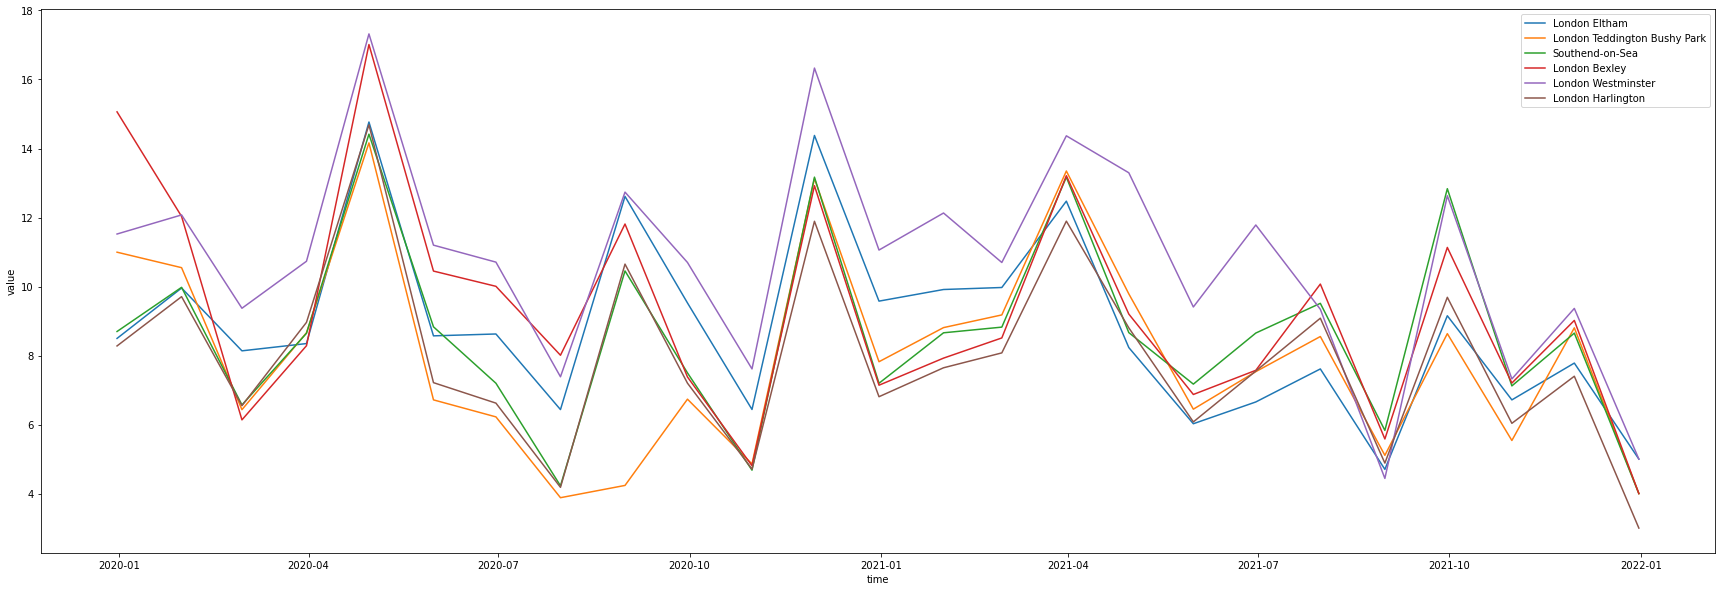

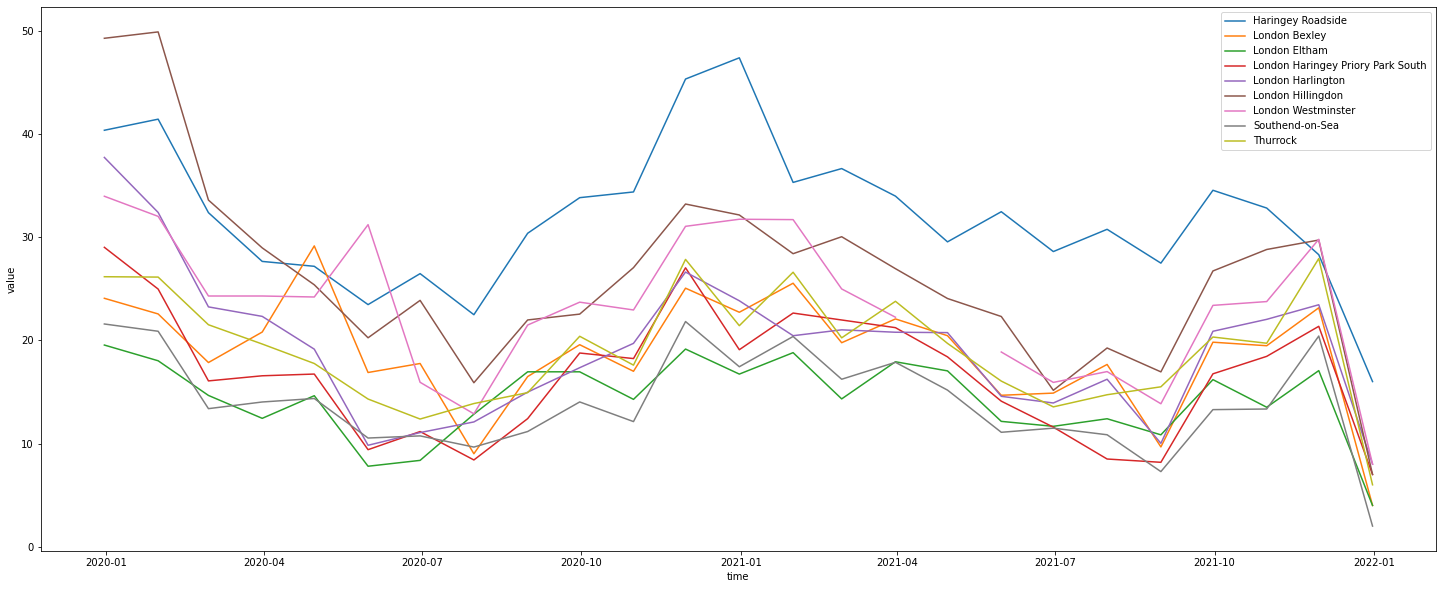

In [6]:
# We try to build a dictionary with the station name and its data, then we plot these data in one figure. 
pm25_monitor_station_name = ["London Eltham", "London Teddington Bushy Park", "Southend-on-Sea", "London Bexley", "London Westminster", "London Harlington"]
individual_station_pm25 = {str(name): measurements_London_pm25_daily_sum.loc[measurements_London_pm25_daily_sum["location"] == name] for name in pm25_monitor_station_name}

plt.figure(figsize=(30,10))
for name in pm25_monitor_station_name:
    individual_station_pm25[name] = individual_station_pm25[name].set_index("date.utc").resample("M").agg({"value":np.mean})
    individual_station_pm25[name]["time"] = individual_station_pm25[name].index 
    ax = sns.lineplot(data = individual_station_pm25[name], x = individual_station_pm25[name]["time"], y = individual_station_pm25[name]["value"], label = name)

#Same process as above
no2_monitor_station_name = ["Haringey Roadside","London Bexley", "London Eltham", "London Haringey Priory Park South", "London Harlington", "London Hillingdon", "London Westminster", "Southend-on-Sea", "Thurrock"]
individual_station_no2 = {str(name): measurements_London_no2_daily_sum.loc[measurements_London_no2_daily_sum["location"] == name] for name in no2_monitor_station_name}

plt.figure(figsize=(25,10))
for name in no2_monitor_station_name:
    individual_station_no2[name] = individual_station_no2[name].set_index("date.utc").resample("M").agg({"value":np.mean})
    individual_station_no2[name]["time"] = individual_station_no2[name].index 
    ax = sns.lineplot(data = individual_station_no2[name], x = individual_station_no2[name]["time"], y = individual_station_no2[name]["value"], label = name)

In [7]:
"""
In this part, we write a function to get the pollutant value from different London monitor station at a specific time. Remember that the pollutant can be selected from co, so2, pm25, pm10, no2 and o3. Its input
form is a string. And the date should be put also in str form with this format "YYYY-MM-DD HH". Invalid input will cause no ouput in result. And in this part we use a package named folium, which is a useful
tool helps us to visualize the data on real map. 
"""

import folium

def map_auto(para, date):
    date_new = date.split(" ")[0]
    map = folium.Map(location = [51.505, -0.09], title = "London "+para+ " monitor station", zoom_start = 10) #Create map oject
    info =api.measurements(city = "London", parameter = para, df = True, date_from = date_new, limit = 80000) # Input all available pollutant data 
    info = info.loc[info["date.utc"] == date+":00:00+00:00"] # Choose the data that matches the time we selected 

    for itr in range(len(info)):
        lat = info.iloc[itr]["coordinates.latitude"]
        lng = info.iloc[itr]["coordinates.longitude"]
        name = info.iloc[itr]["location"]
        val = info.iloc[itr]["value"]
        
        # To make sure that less pollutant value will get lighter green color, and pollutant value higher than 30 will get blue 
        if val <= 5:
            clr = 'green' 
        elif val <= 15 and  5 < val:
            clr = "darkgreen"
        elif val <= 30 and 15 < val:
            clr = "lightblue"
        else:
            clr = "blue"

        folium.Marker(
            location =[lat,lng],
            popup= name + ",  "+para+" value is "+ str(val) +" at time " + date+".",
            icon = folium.Icon(color = clr),
            fill = False,
        ).add_to(map)
    return(map)

map_auto("no2","2021-12-01 03")

In [8]:
map_auto("pm25","2021-12-01 03")

Consider the location and value of each station: 

From the map ,we have noticed that Hillingdon has the second largest value for 10 $\mu$ g/$m^3$ of $NO_2$ while it has a relative low value for 3 $\mu$ g/$m^3$ of $PM_{2.5}$ . This is because Hillingdon is where town and country meet, with 800 acres of woodland, country parks, fields and farms, several rivers and the Grand Union Canal accompany with more complex reaction of nitrogen in soil leading to a notable increase in the $NO_2$. Besides, since it has the second large area with less traffic and less people compared with the central London ,it has less air conditions for $PM_{2.5}$. As well as in a n urban industrial region Harlington reaches a relative low value for 4 $\mu$ g/$m^3$ of $NO_2$,though its location near Hillingdon the difference between these two index on the same day of $NO_2$ varies largely due to the traffic ,surroundings and other factors. With respect to the third largest value of Haringey Roadside where the borough includes large areas of green space leading to relative increase for $NO_2$ due to the land falls sharply away to the flat, open low-lying land beside the River Lea in the east. For the northern part in London Haringey Priory Park and the southern part in London Eitham , the $NO_2$ remains the same.Since these two ares have similar inner land condition with motor vehicle tailpipe dust and fuel oil dust. The rest two part of Thurrock and London Bexley with similar location near the river achieve the same value for $NO_2$ of 2 $\mu$ g/$m^3$ due to the unstable atmosphere and increased rainfall are conducive to atmospheric.The liquidity of particulate factors will be reduced as a result of the dilution and diffusion of pollutants in the atmosphere,then the liquidity of the particles will be reduced.These factors also leads to the result of Southend-on-Sea for $PM_{2.5}$ to keep at a relative low value of 4 $\mu$ g/$m^3$. Both London Bexley and London Eltham with suburban background reach a higher value than London Teddington station with urban background.Besides the central London Marylebone Road with urban traffic reaches both maximum in $NO_2$ and $PM_{2.5}$, consider the background with thses stations we can infer that the main factors are industrial pollution sources and locomotion of air due to atmosphere.Dust including motor vehicle exhaust dust, bowl acid and soot are the main source categories of atmospheric $PM_{2.5}$ and besides nitrate, fuel oil dust and construction cement dust contribute significantly.The contribution of dust to particulate matter is obvious.The contribution of motor vehicle kunqi dust and fuel oil dust to $PM_{2.5}$ is also smaller to $NO_2$; Therefore, the main sources of $PM_{2.5}$ pollution in London urban and suburban area are coal-fired thermal power plants, coal-fired gas-fired heating kilns and industrial processes and industrial processes, such as coal soot, sulphur substances.And there are dozens of industrial enterprises in and around London in all directions that may affect the values of the monitoring points.Besides,London Marylebone Road is located between industrial and urban areas, with a certain heat island effect and a small local circulation when the wind is still or light, especially at night when the inversion is bad for the dispersion of pollutants.Then it leads to a higher increase.


**References**

1.Ailish M. Graham, Kirsty J. Pringle, Stephen R. Arnold, Richard J. Pope, Massimo Vieno, Edward W. Butt, Luke Conibear, Ellen L. Stirling, James B. McQuaid,
Impact of weather types on UK ambient particulate matter concentrations,
Atmospheric Environment: X,
Volume 5,
2020,
100061,
ISSN 2590-1621,
https://doi.org/10.1016/j.aeaoa.2019.100061.
(https://www.sciencedirect.com/science/article/pii/S2590162119300644)


2.Effects of Meteorological Conditions on PM2.5 Concentrations in Nagasaki, Japan
Jianhua Wang and Susumu Ogawa *
Space Engineering and Planning Laboratory, Graduate school of Engineering,
Nagasaki University, 1-14 Bunkyo-machi, Nagasaki 852-8521, Japan;


